In [1]:
import numpy as np
import scipy.linalg as lin
import matplotlib.pyplot as plt

The aim of this tutorial is to compare different numerical methods for solving a vectorial ODE $$\frac{dU}{dt} = AU + S$$ where $A\in\mathbb{R}^{N\times N}$ and $S\in\mathbb{R}^N$. 

We study numerical methods to solve this system.

# An iterative method: Jacobi algorithm

Consider the problem 
\begin{align}MU=b\end{align}
where $M\in\mathbb{R}^{N\times N}$ and $U,b\in\mathbb{R}^N$. Decompose 
\begin{align}M = D - R\end{align} 
where $D =  Diag(M_{1,1},\dots,M_{N,N})$ is the diagonal of $M$ and $R = D-M$ is the remaining part.

Define a sequence $(V^k)_{k\in\mathbb{N}}$ by chosing an initial $V^0 \in\mathbb{R}^N$ and then iteratively 
\begin{align} D V^{k+1} = R V^k + b. \end{align} 

1) Assuming that $M_{i,i} \neq 0$, verify that 
- the sequence $(V^k)_{k\in\mathbb{N}}$ is well-defined, 
- if it converges, then its limit solves $MU = b$, i.e. $\lim\limits_{k\rightarrow \infty}V^k = V^\infty = U$. 
- What information is added to this limit when you consider furthermore that the whole matrix $M = D-R$ is invertible?

Answer: 

- because $D$ is invertible. 
- $DV^{+\infty} - RV^{+\infty} = b \quad \Longrightarrow \quad MU = b$ 
- $U = M^{-1} b$ 

2) What else could happen to $(V^k)$ in the limit $k\rightarrow \infty$? 

Answer: 

- It could diverge. 

3) Implement a function computing iteratively $V^{k+1}$ for solving $MU = b$. Stop the algorithm at iteration $k$ if 
- $k>100$, too many iterations are performed.
- or $\epsilon^k = {\|AV^k-b\|} < \epsilon_{max}$, a desired accuracy is obtained.  

The function should 
- take $M$, $b$, $V^0$, a maximum number of iteration $k_{\max}$ and a certain tolerance $\epsilon_{max}$ for arguments.
- return $V^k$, the final solution at last $k$, the vector of the errors $(\epsilon^i)_{i=1,\dots,k}$ and the final $k$ (either $k$ is such that the desired accuracy is reached or $k=100$).

In [17]:
def iterative_solve(M, b, V0, kmax, epsmax): 
    # solve the equation MU = b using the proposed iterative method
    N       = len(b) 
    V       = np.copy(V0) 
    V_new   = np.copy(V0) 
    epsilon = np.array([lin.norm(np.matmul(M, V) - b)]) 
    k       = 0 
    while (k < kmax) and (epsilon[-1] > epsmax): 
        V = np.copy(V_new) 
        for i in range(N): 
            V_new[i] = sum([M[i,j] * V[j] for j in range(i)]) + sum([M[i,j] * V[j] for j in range(i+1, N)]) 
            V_new[i] = (b[i] - V_new[i]) / M[i,1] 
        epsilon = np.append(epsilon, lin.norm(np.matmul(M, V_new) - b)) 
        k += 1
    return V_new, epsilon, k

In [18]:
D = np.diag(M) 
R = D - M 
V_new = np.matmul(lin.inv(D), np.matmul(R, V) + b) 

ValueError: expected square matrix

4) Consider the matrices $B(x) \in\mathbb{R}^{N\times N}$ defined for $x\in\mathbb{R}$ by: 
\begin{align}
    B(x)_{i,j} = x \delta_{i,j} - \frac{1}{N}.
\end{align} 

Choose the data: \begin{align} N = 10,  \quad \epsilon_{max} = 10^{-8}, \quad b \in\mathbb{R}^N \quad\text{and}\quad V^0 \in\mathbb{R}^N \quad\text{s.t.}\quad b_i=1, \quad V^0 = e^0,\end{align}
and the matrix to invert $M=B(x=2)$.

- Compute $V^k$ and $MV^k - b$ at the end of the iterations. 
- Verify that the error $\epsilon^k$ is inferior to desired accuracy $\epsilon_{max}$ or that $k=100$.
- Plot the error $\epsilon^k$ as a function of $k$ in logscale.  

solution =  [ 1.07886687e+90 -6.43602040e+88  1.07886687e+90  1.07886687e+90
  1.07886687e+90  1.07886687e+90  1.07886687e+90  1.07886687e+90
  1.07886687e+90  1.07886687e+90]
residual =  [3.16227766e+00 3.72611507e+01 2.38504168e+02 1.95074849e+03
 1.54326049e+04 1.22597203e+05 9.73407043e+05 7.72924438e+06
 6.13728071e+07 4.87321296e+08 3.86949898e+09 3.07251555e+10
 2.43968323e+11 1.93719257e+12 1.53819766e+13 1.22138195e+14
 9.69819362e+14 7.70069996e+15 6.11462116e+16 4.85521993e+17
 3.85521195e+18 3.06117115e+19 2.43067539e+20 1.93004003e+21
 1.53251829e+22 1.21687234e+23 9.66238575e+23 7.67226728e+24
 6.09204463e+25 4.83729339e+26 3.84097765e+27 3.04986863e+28
 2.42170080e+29 1.92291389e+30 1.52685990e+31 1.21237938e+32
 9.62671010e+32 7.64393958e+33 6.06955146e+34 4.81943303e+35
 3.82679592e+36 3.03860784e+37 2.41275935e+38 1.91581407e+39
 1.52122240e+40 1.20790301e+41 9.59116617e+41 7.61571648e+42
 6.04714134e+43 4.80163863e+44 3.81266655e+45 3.02738863e+46
 2.40385091e+47 1.9

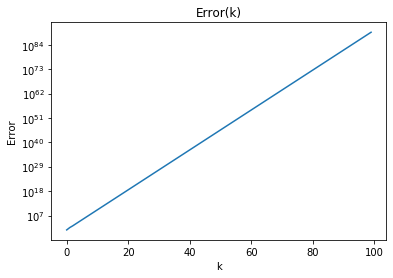

In [20]:
### test your aglorithm
#Construction of the matrices and vectors
N = 10
x = 2 

M        = x * np.eye(N) - np.ones(N) / N 
b        = np.ones(N) 
V0       = np.zeros(N) 

#Parameter of the method
kmax     = 100
epsmax   = 10**(-8)


#Solving the system
U, eps, k = iterative_solve(M, b, V0, kmax, epsmax) 

print('solution = ', U)
print('residual = ', eps) 
print('final iteration', k) 

plt.figure(1)
plt.semilogy(range(k), eps[:k]) 
plt.xlabel('k')
plt.ylabel('Error')
plt.title("Error(k)")
plt.show()

5) What can you say about the convergence rate of the algorithm, i.e. the speed of convergence of the sequence $(V^k)_{k\in\mathbb{N}}$ to the desired result?

Answer: 

6) Reproduce the previous computations with $x=5$ and $x=10$, and plot on the same graph the errors obtained with your algorithm for the different values of $x$. Interprete the evolution of this convergence rate with $x$.

solution2 =  [ 1.70150609e+90 -3.91779522e+88  1.70150609e+90  1.70150609e+90
  1.70150609e+90  1.70150609e+90  1.70150609e+90  1.70150609e+90
  1.70150609e+90  1.70150609e+90]
residual2 =  [3.16227766e+00 1.26382089e+02 8.58986988e+02 7.00122118e+03
 5.56994500e+04 4.44462206e+05 3.54531460e+06 2.82810334e+07
 2.25596934e+08 1.79958115e+09 1.43552129e+10 1.14511168e+11
 9.13452672e+11 7.28658871e+12 5.81249327e+13 4.63661108e+14
 3.69861286e+15 2.95037406e+16 2.35350588e+17 1.87738565e+18
 1.49758575e+19 1.19462034e+20 9.52945607e+20 7.60162285e+21
 6.06379520e+22 4.83707399e+23 3.85852161e+24 3.07793287e+25
 2.45525921e+26 1.95855402e+27 1.56233356e+28 1.24626950e+29
 9.94146011e+29 7.93027742e+30 6.32596211e+31 5.04620387e+32
 4.02534399e+33 3.21100665e+34 2.56141183e+35 2.04323170e+36
 1.62988072e+37 1.30015171e+38 1.03712771e+39 8.27314131e+39
 6.59946376e+40 5.26437544e+41 4.19937889e+42 3.34983385e+43
 2.67215394e+44 2.13157039e+45 1.70034828e+46 1.35636349e+47
 1.08196770e+48 8

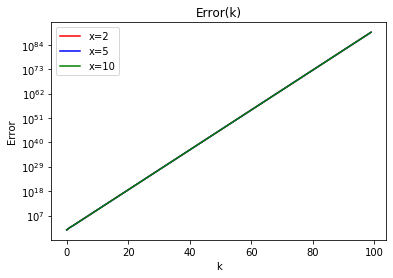

In [22]:
### test your aglorithm with other parameters
kmax     = 100
epsmax   = 10**(-8)

N  = 10
x  = 5
M2 = x * np.eye(N) - np.ones(N) / N 
b  = np.ones(N) 

V0 = np.zeros(N) 

U2, eps2, k2 = iterative_solve(M2, b, V0, kmax, epsmax) 

print('solution2 = ', U2)
print('residual2 = ', eps2) 
print('final iteration2', k2) 

x  = 10
M3 = x * np.eye(N) - np.ones(N) / N 

U3, eps3, k3 = iterative_solve(M3, b, V0, kmax, epsmax) 

print()
print('solution3 = ', U3) 
print('residual3 = ', eps3) 
print('final iteration3', k3) 


plt.figure(2)
plt.semilogy(range(k), eps[:k], 'r', label='x=2')
plt.semilogy(range(k2), eps[:k2], 'b', label='x=5')
plt.semilogy(range(k3), eps[:k3], 'g', label='x=10')
plt.xlabel('k')
plt.ylabel('Error')
plt.legend()
plt.title("Error(k)")
plt.show()

7) Test again the algorithm with $x=\frac{2}{N}$. Give an interpretation.

solution4 =  [ 2.50686602e+82 -3.39492002e+82  2.50686602e+82  2.50686602e+82
  2.50686602e+82  2.50686602e+82  2.50686602e+82  2.50686602e+82
  2.50686602e+82  2.50686602e+82]
residual4 =  [3.16227766e+00 1.74928557e+01 1.22449990e+02 8.11897777e+02
 5.40340726e+03 3.59099396e+04 2.38659092e+05 1.58607304e+06
 1.05406627e+07 7.00506342e+07 4.65539119e+08 3.09385724e+09
 2.05610058e+10 1.36643332e+11 9.08097600e+11 6.03499081e+12
 4.01070481e+13 2.66541468e+14 1.77136831e+15 1.17720733e+16
 7.82342713e+16 5.19925511e+17 3.45529564e+18 2.29630356e+19
 1.52606624e+20 1.01418567e+21 6.74002574e+21 4.47925349e+22
 2.97680048e+23 1.97830757e+24 1.31473401e+25 8.73739528e+25
 5.80665561e+26 3.85895891e+27 2.56456813e+28 1.70434820e+29
 1.13266743e+30 7.52742604e+30 5.00254015e+31 3.32456377e+32
 2.20942241e+33 1.46832719e+34 9.75813732e+34 6.48501539e+35
 4.30977995e+36 2.86417258e+37 1.90345787e+38 1.26499076e+39
 8.40681400e+39 5.58695952e+40 3.71295436e+41 2.46753713e+42
 1.63986381e+43 1

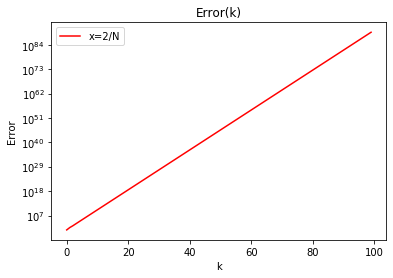

In [23]:
### test your aglorithm with other parameters
kmax     = 100
epsmax   = 10**(-8)

N  = 10
x  = 2/N 
M4 = x * np.eye(N) - np.ones(N) / N 
b  = np.ones(N) 

V0 = np.zeros(N) 

U4, eps4, k4 = iterative_solve(M4, b, V0, kmax, epsmax) 

print('solution4 = ', U4)
print('residual4 = ', eps4)
print('final iteration4', k4) 

plt.figure(4) 
plt.semilogy(range(k), eps[:k], 'r', label='x=2/N')
plt.xlabel('k')
plt.ylabel('Error')
plt.legend()
plt.title("Error(k)")
plt.show()

Answer: 

# Application for solving the ODE

In order to solve this ODE numerically, we need to reduce it into a finite dimensional problem. For this purpose, we use an implicit Euler time discretization: This method consists in approximating the value of $U$ at a finite number of values $(t^n)_{n=0,\dots,N}$. One writes \begin{equation} \frac{U^{n+1} - U^n}{\Delta t} = A U^{n+1} + S, \qquad{} (1)\end{equation}
where $U^n \approx U(t^n)$ approximates the value of $U$ at time $t^n$, and $\Delta t = t^{n+1}-t^n$ is the time step between the times $t^{n+1}$ and $t^n$. We choose to fix $\Delta t$ constant for all $n$. Remark that this definition of $U^{n+1}$ is equivalent to the vectorial equation of the last question, but without the infinitesimal hypothesis of $\delta t$. This is therefore only an approximation. 

1) Rewrite the discrete equation (1) under the form $B U^{n+1} = C U^n + E S$ (identify the matrices $B$, $C$ and $E$). 

Answer: 

- $B = I_n - \Delta t A$ 
- $C = I_n$ 
- $E = \Delta t I_n$ 

2) Using Gershgorin theorem, 

a) what can you deduce on the eigenvalues of $B$ when $\Delta t$ is small? 

b) What can you deduce on the eigenvalues of its Jacobi iteration matrix ?

Answer:

3) Implement a function that 
- take as arguments: initial vector $U_0$, the matrix $A$, the source vector $S$ (constant), the time step $\Delta t$, the final time $T$ and the maximum number of iteration $k_{\max}$ and maximum tolerance $\epsilon_{\max}$
of the iterative mathod
- returns the sequence of the approximate solution $U^{n}$.  

It should compute iteratively each $U^{n+1}$ based on $U^n$, by solving the linear system (2) with the Jacobi iteration method of the last section. Choose $U^n$ as an initialisation when using this method to compute $U^{n+1}$.

In [ ]:
def solve_ODE_Jacobi(U0, A, S, dt, T_end, kmax, eps_max):
    # assemble the data (construct the matrices and vectors)
    # define iteratively U^{n+1} as a function of U^n 
    
    U = np.zeros((,))
        
    return U

4) Test it with the matrix $A$ such that $A_{i,j} = 1/N$ for all $i,j$.

- Problem parameters: Choose the data: $N = 10$, $S \in\mathbb{R}^N$ such that $S=(1,2,\dots,N)$. 
- ODE parameters: Choose $U^0 = (N,\dots, 2,1)$ at initial time, final time is $T=1$ and fix $\Delta t = \frac{1}{100}$ (or equivalently do $n_{final} = 100$ time steps).
- Iterative methods parameters: Choose the maximum error is $\epsilon_{max} = 10^{-8}$, and a maximum number of iteration $k_max = 100$.

Plot the solution $U_i^{n_{final}}$ on a graph as a function of $i$. 

In [ ]:
#Problem parameters
N   = 10

#ODE parameters
dt    = 1/100.
T_end = 1.

U0    = 
S     = 
A     = 

#Iterative method parameters
epsmax = 10**(-8)
kmax   = 100

# Solve
U = 


plt.figure(3)
plt.xlabel('t')
plt.ylabel('U_i')
plt.title('U_i(t)')
plt.plot(,)
plt.show()